# TP 8 : Distribution Gaussienne
Dans ce TP, nous aimerions explorer le classifieur base sur les distributions gaussiennnes pour une classification binaire.



# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.metrics import f1_score
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
X = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/TP8_IARN/X.csv', delimiter=',', dtype=float)
X.shape

(307, 2)

In [ ]:
y = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/TP8_IARN/yval.csv', delimiter=',', dtype=float)
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)
y.shape

(307, 1)

Dans ces données (data), les 2 premières colonnes representent les caracteristiques de l'ensemble d'entrainement.

Chaque ligne represente un exemple de notre ensemble de données.


# Entrainement
dans cette partie nous allons calculer les parametres de la disribution gaussienne de chaque caracteristique.

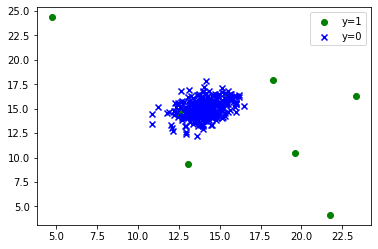

In [ ]:
plt.scatter(X[np.where(y==1),0],X[np.where(y==1),1], label="y=1",c = 'green', marker ='o')
plt.scatter(X[np.where(y==0),0],X[np.where(y==0),1], label="y=0", c = 'blue', marker ='x')
plt.legend()

⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛
on remarque que la plupart des exemples de nos données suivent la loi : x1 petit, x2 petit aussi ( les deux variables sont corrélées)
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

Mettons un lien avec ce que nous avons appris en regression linéaire

In [ ]:
# calcule des paramètres de la distribution gaussienne univariée de chaque caractéristique
m = np.mean(X, axis=0)
v = np.var(X, axis=0)

In [ ]:
def calculProba(X,m,v):
    return (1 / (np.sqrt(2 * v * np.pi))) * np.exp(- np.power(X - m, 2) / (2 * v))

Text(0.5, 0, 'X1')

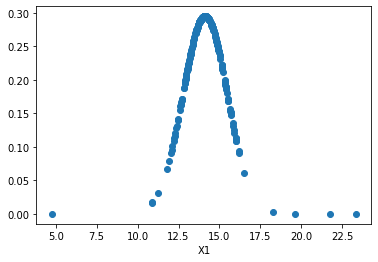

In [ ]:
prob = calculProba(X,m,v)
plt.scatter(X[:,0],prob[:,0])
plt.xlabel('X1')

Text(0.5, 0, 'X2')

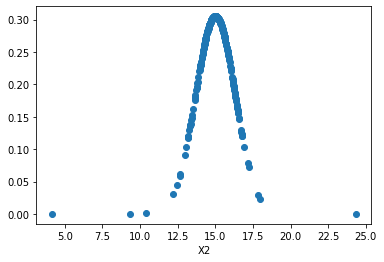

In [ ]:
plt.scatter(X[:,1],prob[:,1])
plt.xlabel('X2')

In [ ]:
f1_scores = []
proba = calculProba(X, m, v)
yproba = proba[:,0]*proba[:,1]
for epsilon in np.arange(0, 1, 0.0001):
    y_pred = np.ones(yproba.shape)
    y_pred[yproba >= epsilon] = 0
    f1_scores.append((epsilon, f1_score(y, y_pred)))

# Travail à faire
- 1) Nous aimerions bien choisir le epsilon, ceci est fait en analysant le score F1 obtenu precedenmment
- 2) nous aimerions appliquer une gaussienne multivariée à nos caracterisqtues; et comparer les deux résultats (multiplication des gaussiennes univariées, et gaussienne multivariée)
- 3) Nous aimerions visualiser en 3D la multiplication des gaussiennes univariées et la gaussienne multivariée pour comparaison.
- 4) **** En Bonus - PAS obligatoire **** : nous aimerions utiliser la loi de Bayes afin de classifier nos exemples. Pour cela, voir le cours.


**1) Choix du epsilon**

In [ ]:
# trier la liste f1_scores dans l'ordre décroissant
f1_scores = sorted(f1_scores,key=lambda x: x[1], reverse=True)
# le epsilon choisie est celui qui produit la plus grande valeur de f1_score
# et donc l'élèment 1 du premier tuple de la liste f1_scores
tuple = f1_scores[0]
epsilon = tuple[0]
print("########################################################################\n")
print("epsilon : "+str(tuple[0])+"    f1_score : "+str(tuple[1])+"\n")
print("########################################################################")

########################################################################

epsilon : 0.0001    f1_score : 0.8

########################################################################


⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛
l'epsilon qui donnent la meilleur précision (f1_score) c'est à dire qui permet une bonne classification vaut : **0.0001**
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

**2) Application d'une gaussienne multivariée à nos caracteristiques et comparer les deux résultats (multiplication des gaussiennes univariées, et gaussienne multivariée)**

In [ ]:
# calcul des paramètres de la distribution gaussienne multivarié de chaque caractéristique
mean_m = np.mean(X, axis=0)
covariance_m = np.cov(X.T) # matrice de covariance
print("########################################################################\n")
print("mean : "+str(mean_m)+"\n")
print("covariance matrix : \n"+str(covariance_m)+"\n")
print("########################################################################")

########################################################################

mean : [14.11225277 14.99767459]

covariance matrix : 
[[ 1.83866684 -0.22783493]
 [-0.22783493  1.71530264]]

########################################################################


In [ ]:
from math import pi
def calculProbaMultivariate(X,m,c):
    n = X.shape[1] # nombre de caractéristiques
    det = np.linalg.det(c) # determinant de la matrice de covariances c
    inverse = np.linalg.inv(c) # l'inverse de la matrice de covariances c
    return (1/(np.power(2*pi, n/2) * np.power(det, 1/2)) * np.exp(-1/2 * np.matmul(np.matmul(X-m, inverse), (X-m).T)))

Text(0.5, 0, 'X1')

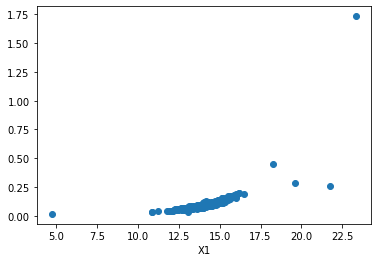

In [ ]:
prob_m = calculProbaMultivariate(X,mean_m,covariance_m)
plt.scatter(X[:,0],prob_m[:,0])
plt.xlabel('X1')

Text(0.5, 0, 'X2')

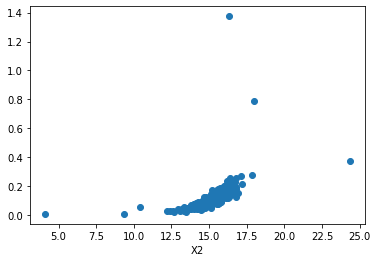

In [ ]:
plt.scatter(X[:,1],prob_m[:,1])
plt.xlabel('X2')

In [ ]:
f1_scores_m = []
yproba_m = prob_m[:,0]*prob_m[:,1]
for epsilon in np.arange(0, 1, 0.0001):
    y_pred_m = np.ones(yproba_m.shape)
    y_pred_m[yproba_m >= epsilon] = 0
    f1_scores_m.append((epsilon, f1_score(y, y_pred_m)))

In [ ]:
# trier la liste f1_scores dans l'ordre décroissant
f1_scores_m = sorted(f1_scores_m,key=lambda x: x[1], reverse=True)
# le epsilon choisie est celui qui produit la plus grande valeur de f1_score
# et donc l'élèment 1 du premier tuple de la liste f1_scores
tuple_m = f1_scores_m[0]
epsilon_m = tuple_m[0]
print("########################################################################\n")
print("epsilon : "+str(tuple_m[0])+"    f1_score : "+str(tuple_m[1])+"\n")
print("########################################################################")

########################################################################

epsilon : 0.00030000000000000003    f1_score : 0.19999999999999998

########################################################################


**Remarques**

*   f1_score_multivariée : **0.2**
*   f1_score_univariée : **0.8**
*   f1_score_univariée (**0.8**) **>** f1_score_multivariée(**0.2**), donc on pourrait dire que pour notre ensemble de données la classification gaussiennes univariée produit de meilleur résultats ( bonne calassification)





**3) Nous aimerions visualiser en 3D la multiplication des gaussiennes univariées et la gaussienne multivariée pour comparaison.**

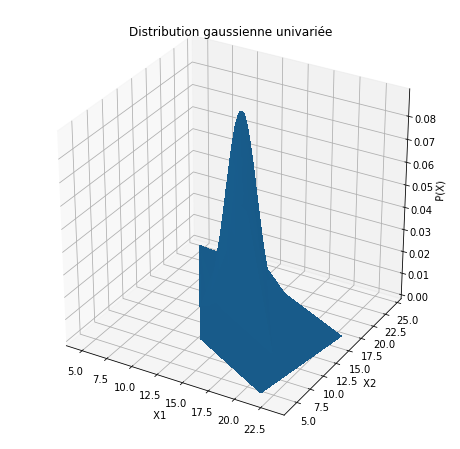

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# distribution gaussienne univariée
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection = '3d')
ax.plot_trisurf(X[:, 0], X[:, 1], yproba.reshape(len(yproba)), linewidth=0, antialiased=False)
ax.set_xlabel(' X1')
ax.set_ylabel(' X2')
ax.set_zlabel(' P(X)')
plt.title("Distribution gaussienne univariée")
plt.show()

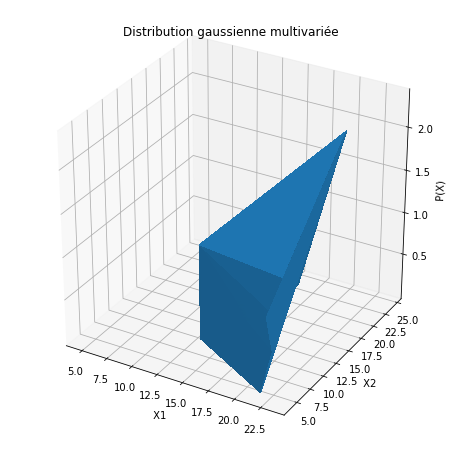

In [ ]:
# distribution gaussienne multivariée
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection = '3d')
ax.plot_trisurf(X[:, 0], X[:, 1], yproba_m.reshape(len(yproba_m)), linewidth=0, antialiased=False)
ax.set_xlabel(' X1')
ax.set_ylabel(' X2')
ax.set_zlabel(' P(X)')
plt.title("Distribution gaussienne multivariée")
plt.show()